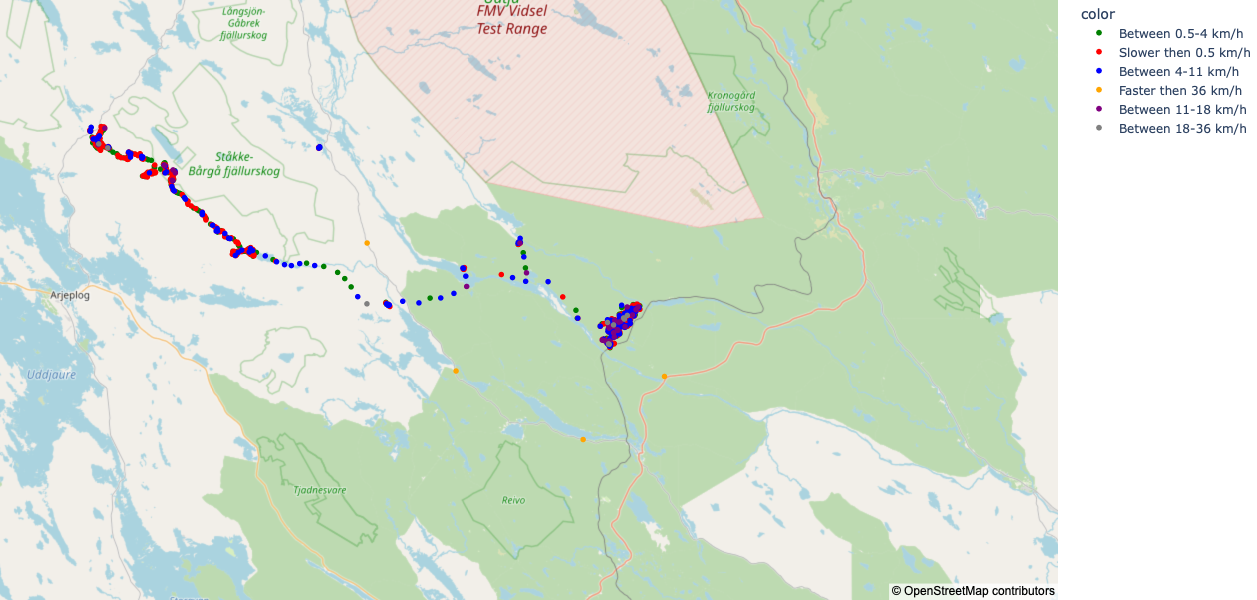

In [1]:
#
#     Staakke.ipynb
#
#          Project:  PM1
#          Author:   Hans-Henrik Fuxelius   
#          Date:     2023-07-02       
#          Descr:    Projection of GPS positions in reindeer
#          Ref:      SLU
#

import pandas as pd
import plotly.express as px

df_pos = pd.read_csv("negev21_0003_20221121_1905.csv")

df_pos['dop_size'] = 1 / df_pos['dop'] 
  
df_pos['color'] = 'Faster then 36 km/h'                                                      
df_pos.loc[((df_pos['speed'] > 5)   & (df_pos['speed'] <= 10)), 'color']   = 'Between 18-36 km/h' 
df_pos.loc[((df_pos['speed'] > 3)   & (df_pos['speed'] <= 5)), 'color']    = 'Between 11-18 km/h' 
df_pos.loc[((df_pos['speed'] > 1)   & (df_pos['speed'] <= 3)), 'color']    = 'Between 4-11 km/h' 
df_pos.loc[((df_pos['speed'] > 0.15) & (df_pos['speed'] <= 1)), 'color']   = 'Between 0.5-4 km/h' 
df_pos.loc[((df_pos['speed'] > 0)   & (df_pos['speed'] <= 0.15)), 'color'] = 'Slower then 0.5 km/h' 

speed_categories = {'speed': ['Faster then 36 km/h', 'Between 18-36 km/h', 'Between 11-18 km/h', 
                              'Between 4-11 km/h', 'Between 0.5-4 km/h', 'Slower then 0.5 km/h']}

band_colors_list = ['green', 'red', 'blue', 'orange', 'purple', 'gray', 'yellow']

fig = px.scatter_mapbox(df_pos, lat="lat", lon="lon", hover_name="event_time", hover_data=["alt", "dop", "speed"],
                        category_orders=speed_categories,
                        color_discrete_sequence=band_colors_list,
                        # size=df_pos['dop_size'],
                        color=df_pos['color'], zoom=8, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()